In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [3]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [4]:
data = loan_approval_lib.load_original_data()

In [5]:
for col in sorted(data.columns):
    print(col)

cb_person_cred_hist_length
cb_person_default_on_file
loan_amnt
loan_grade
loan_int_rate
loan_intent
loan_percent_income
loan_status
person_age
person_emp_length
person_home_ownership
person_income


In [14]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


In [15]:
data_test = loan_approval_lib.load_data()['test']

In [16]:
for col in sorted(data_test.columns):
    print(col)

cb_person_cred_hist_length
cb_person_default_on_file
id
loan_amnt
loan_grade
loan_int_rate
loan_intent
loan_percent_income
person_age
person_emp_length
person_home_ownership
person_income


In [17]:
data_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [18]:
data_train = loan_approval_lib.load_data()['train']

In [19]:
for col in sorted(data_train.columns):
    print(col)

cb_person_cred_hist_length
cb_person_default_on_file
id
loan_amnt
loan_grade
loan_int_rate
loan_intent
loan_percent_income
loan_status
person_age
person_emp_length
person_home_ownership
person_income


In [20]:
data_train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


# Data Cleaning - For now simply remove spurious values and NaNs

- Revisit this later. Might be able to keep some rows of useful data by replacing NaN values with the mean
- TODO: Does the TEST data contain any NaN?

In [6]:
data[data['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0.02,N,3,0
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0.03,N,2,0
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0.25,N,3,0
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0.26,N,4,0
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0.00,N,25,0


In [7]:
data[data['person_age'] < 18]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [8]:
data[data['person_emp_length'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0.10,N,4,0


In [9]:
data[data['person_emp_length'] < 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [10]:
columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file'
]

for column in columns:
    row_count_1 = len(data)

    if column == 'person_age':
        data = data[data['person_age'] <= 100]

    if column == 'person_emp_length':
        data = data[data['person_emp_length'] <= 100]

    data = data[data[column].isna() == False]
    
    row_count_2 = len(data)
    row_count_diff = row_count_1 - row_count_2
    print(f'column {column}, number of removed rows: {row_count_diff}')
    

column person_age, number of removed rows: 5
column person_income, number of removed rows: 0
column person_emp_length, number of removed rows: 897
column loan_amnt, number of removed rows: 0
column loan_int_rate, number of removed rows: 3047
column loan_percent_income, number of removed rows: 0
column cb_person_default_on_file, number of removed rows: 0


In [11]:
len(data)

28632

In [21]:
data_test[data_test['loan_int_rate'].isna()]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [22]:
data_test[data_test['loan_percent_income'].isna()]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


# Numerical Columns

- person_income
- loan_amnt
- loan_int_rate
- loan_percent_income

# Integer Numerical Columns

Columns with small number of unique integer values. These may behave somewhat like categorical labels.

- person_age
- person_emp_length
- cb_person_cred_hist_length

# Integer Columns - Low number of unique values

- `person_age` has 58 unique values
- `person_emp_length` has 37 unique values
- `cb_person_cred_hist_length` has 29 unique values

In [31]:
len(data['person_age'].unique())

58

In [37]:
tmp = data['person_emp_length'].unique()
tmp.sort()
tmp

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  34.,
        38.,  41., 123.,  nan])

In [43]:
len(tmp)

37

In [46]:
len(data['cb_person_cred_hist_length'].unique())

29

In [38]:
len(data['person_income'].unique())

3834

In [39]:
data['person_income'].min()

np.int64(4000)

In [40]:
data['person_income'].max()

np.int64(2039784)

In [43]:
len(data['loan_amnt'].unique())

728

In [37]:
data['person_home_ownership'].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object)

In [47]:
data['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [51]:
sorted(data['loan_grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Integer Columns - High number of unique values

- `person_income` has 4130 unique values
- `loan_amnt` has 349 unique values
- `loan_int_rate` has 349 unique values
- `loan_percent_income` has 77 unique values, likely due to 2 dp rounding

In [50]:
len(data['person_income'].unique())

4130

In [52]:
len(data['loan_amnt'].unique())

749

In [55]:
len(data['loan_int_rate'].unique())

349

In [56]:
len(data['loan_percent_income'].unique()) # rounded to 2 dp, so sort of a high number of unique values...

77

In [44]:
len(data['loan_int_rate'].unique())

348

In [45]:
data['loan_percent_income'].unique()

array([0.1 , 0.57, 0.53, 0.55, 0.25, 0.45, 0.44, 0.42, 0.16, 0.41, 0.37,
       0.32, 0.3 , 0.06, 0.29, 0.31, 0.22, 0.52, 0.14, 0.49, 0.13, 0.5 ,
       0.35, 0.17, 0.27, 0.33, 0.08, 0.03, 0.21, 0.63, 0.47, 0.4 , 0.07,
       0.38, 0.34, 0.04, 0.23, 0.11, 0.43, 0.51, 0.28, 0.19, 0.39, 0.09,
       0.05, 0.15, 0.59, 0.18, 0.6 , 0.01, 0.48, 0.12, 0.54, 0.56, 0.46,
       0.36, 0.24, 0.02, 0.26, 0.2 , 0.72, 0.64, 0.69, 0.77, 0.61, 0.83,
       0.65, 0.67, 0.58, 0.71, 0.68, 0.7 , 0.66, 0.  , 0.76, 0.62, 0.78])

In [46]:
len(data['loan_percent_income'].unique())

77

# Person Employment Length - Spurious Values

In [23]:
data[data['person_emp_length'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [24]:
data[data['person_emp_length'] < 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [23]:
data = data[data['person_emp_length'] <= 100]

In [31]:
len(data)

31684

In [32]:
len(loan_approval_lib.load_original_data())

32581

In [35]:
data_tmp_1 = loan_approval_lib.load_original_data()
data_tmp_2 = loan_approval_lib.load_original_data()

In [36]:
data_tmp_1[data_tmp_1['person_emp_length'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0.10,N,4,0


In [37]:
len(data_tmp_1[data_tmp_1['person_emp_length'] > 100])

2

In [40]:
len(data_tmp_2[data_tmp_2['person_emp_length'] <= 100])

31684

In [43]:
data_tmp_2 = data_tmp_2[data_tmp_2['person_emp_length'] <= 100]

In [44]:
print(len(data_tmp_1), len(data_tmp_2), len(data_tmp_1) - len(data_tmp_2))

32581 31684 897


In [45]:
data_tmp_2.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0.15,N,30,0


In [46]:
data_tmp_1.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0.15,N,30,0


In [47]:
data_tmp_1.to_csv('data_tmp_1.csv')
data_tmp_2.to_csv('data_tmp_2.csv')

# Person Age - Spurious Values

In [25]:
data[data['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [26]:
data[data['person_age'] < 18]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [69]:
data = data[data['person_age'] <= 100]

# Perform Logistic Regression for all Numerical Columns

## Person Age

clf score: 0.7845575933583762
20 94


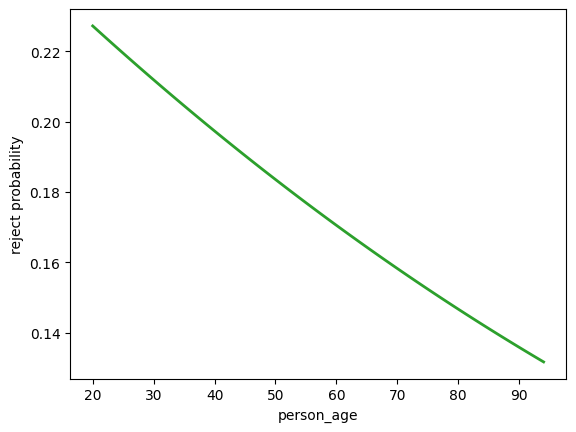

In [78]:
column = 'person_age'

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = x.min()
x_max = x.max()
print(x_min, x_max)
xx = numpy.linspace(x_min, x_max, 100)
#xx = numpy.linspace(-500, 500, 100)

plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    color='tab:green',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('reject probability')
None

## Person Income

clf score: 0.7845575933583762
4000 2039784


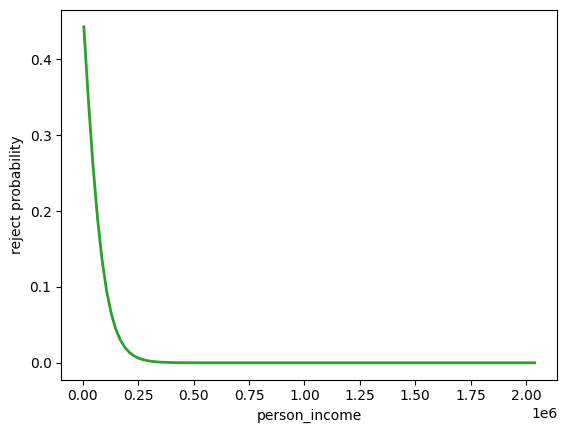

In [79]:
column = 'person_income'

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = x.min()
x_max = x.max()
print(x_min, x_max)
xx = numpy.linspace(x_min, x_max, 100)
#xx = numpy.linspace(-500, 500, 100)

plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    color='tab:green',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('reject probability')
None

## Person Employment Length

clf score: 0.7845575933583762
0.0 41.0


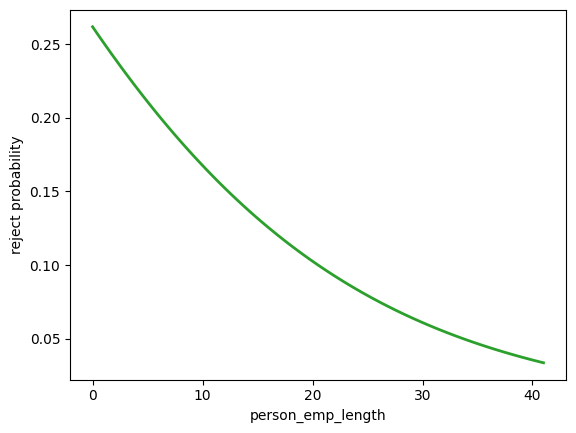

In [73]:
column = 'person_emp_length'

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = x.min()
x_max = x.max()
print(x_min, x_max)
xx = numpy.linspace(x_min, x_max, 100)
#xx = numpy.linspace(-500, 500, 100)

plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    color='tab:green',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('reject probability')
None

## Loan Amount

clf score: 0.7845575933583762
500 35000


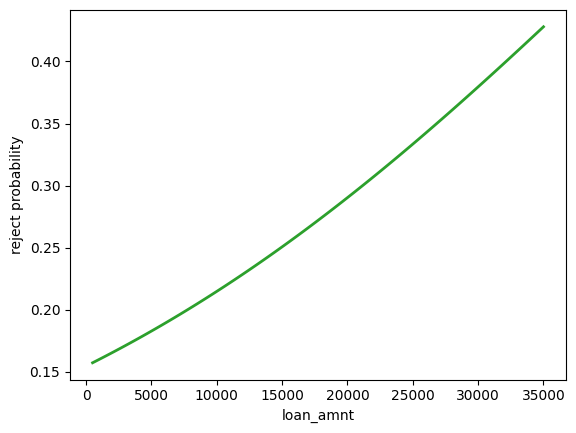

In [81]:
column = 'loan_amnt'

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = x.min()
x_max = x.max()
print(x_min, x_max)
xx = numpy.linspace(x_min, x_max, 100)
#xx = numpy.linspace(-500, 500, 100)

plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    color='tab:green',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('reject probability')
None

## Loan Interest Rate

clf score: 0.7969055602123498
5.42 23.22


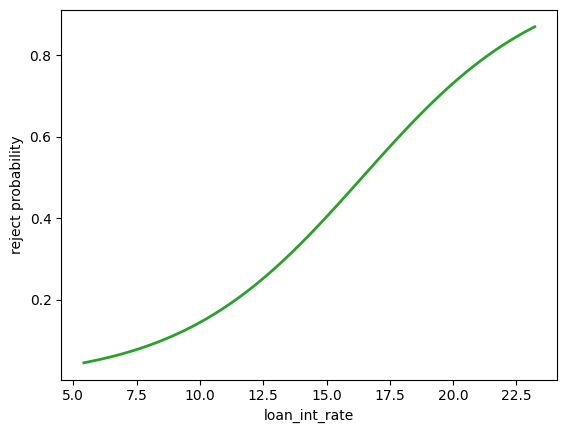

In [83]:
column = 'loan_int_rate'

x = data[data[column].isna() == False][column].to_numpy().reshape(-1, 1)
y = data[data[column].isna() == False]['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = x.min()
x_max = x.max()
print(x_min, x_max)
xx = numpy.linspace(x_min, x_max, 100)
#xx = numpy.linspace(-500, 500, 100)

plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    color='tab:green',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('reject probability')
None

## Loan Percentage of Income

clf score: 0.8147177982676725
0.0 0.83


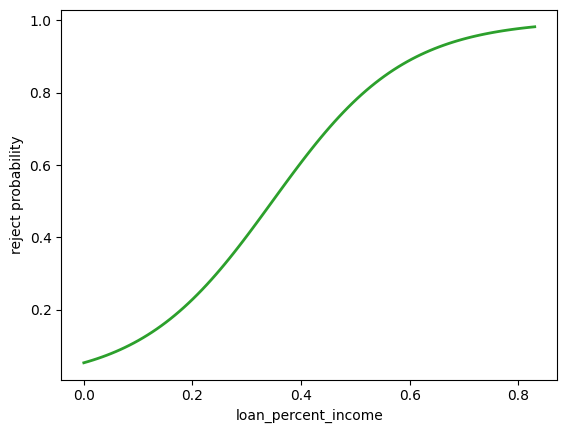

In [27]:
column = 'loan_percent_income'

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = x.min()
x_max = x.max()
print(x_min, x_max)
xx = numpy.linspace(x_min, x_max, 100)
#xx = numpy.linspace(-500, 500, 100)

plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    color='tab:green',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('reject probability')
None

In [29]:
# Save LL value for comparison later
y_predict_proba = clf.predict_proba(x)
log_loss_value_model_1 = log_loss(y, y_predict_proba)
log_loss_value_model_1

0.45477245694918267

## Credit History Length

clf score: 0.7845575933583762
2 30


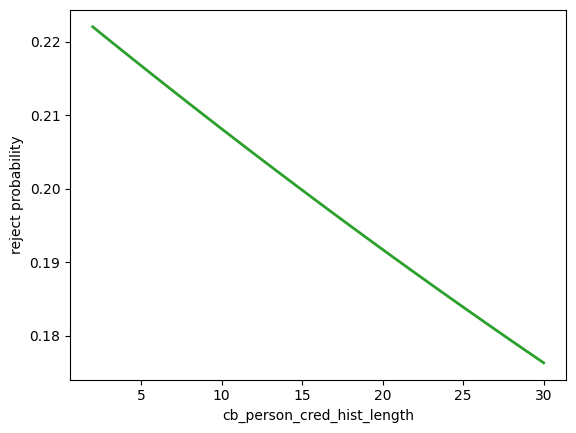

In [85]:
column = 'cb_person_cred_hist_length'

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = x.min()
x_max = x.max()
print(x_min, x_max)
xx = numpy.linspace(x_min, x_max, 100)
#xx = numpy.linspace(-500, 500, 100)

plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    color='tab:green',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('reject probability')
None


# Combine All Factors into Multidimensional Logistic Regression

In [102]:
# Collect input data arrays
x_person_age = data['person_age'].to_numpy().reshape(-1, 1)
x_person_income = data['person_income'].to_numpy().reshape(-1, 1)
x_person_emp_length = data['person_emp_length'].to_numpy().reshape(-1, 1)
x_loan_amnt = data['loan_amnt'].to_numpy().reshape(-1, 1)
x_loan_int_rate = data['loan_int_rate'].to_numpy().reshape(-1, 1)
x_loan_percent_income = data['loan_percent_income'].to_numpy().reshape(-1, 1)
x_cb_person_cred_hist_length = data['cb_person_cred_hist_length'].to_numpy().reshape(-1, 1)

# Remove NaN values by replacing with mean value
x_loan_int_rate_no_nan = x_loan_int_rate[numpy.isfinite(x_loan_int_rate)]
#print(f'l: {len(x_loan_int_rate_no_nan)}, {len(x_loan_int_rate)}')
x_loan_int_rate_mean = x_loan_int_rate_no_nan.mean()
#print(f'mean: {x_loan_int_rate_mean}')
x_loan_int_rate[numpy.isnan(x_loan_int_rate)] = x_loan_int_rate_mean
#print(x_loan_int_rate)

x = numpy.concatenate([x_person_age, x_person_income, x_person_emp_length, x_loan_amnt, x_loan_int_rate, x_loan_percent_income, x_cb_person_cred_hist_length], axis=1)
#print(x.shape)

scaler = preprocessing.StandardScaler().fit(x)

#print(scaler.mean_)
#print(scaler.scale_)

x_scaled = scaler.transform(x)

y = data['loan_status'].to_numpy()
#print(y.shape)

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x_scaled, y)

print(f'clf score: {clf.score(x_scaled, y)}')

[2.77306733e+01 6.64900992e+04 4.78206383e+00 9.65996244e+03
 1.10397014e+01 1.69610152e-01 5.80921115e+00]
[6.21332855e+00 5.27679606e+04 4.03488438e+00 6.33426058e+03
 3.07012202e+00 1.06267212e-01 4.05964586e+00]
clf score: 0.8310237065563938


## Perform Prediction

In [103]:
# Collect input data arrays
x1_person_age = data_test['person_age'].to_numpy().reshape(-1, 1)
x1_person_income = data_test['person_income'].to_numpy().reshape(-1, 1)
x1_person_emp_length = data_test['person_emp_length'].to_numpy().reshape(-1, 1)
x1_loan_amnt = data_test['loan_amnt'].to_numpy().reshape(-1, 1)
x1_loan_int_rate = data_test['loan_int_rate'].to_numpy().reshape(-1, 1)
x1_loan_percent_income = data_test['loan_percent_income'].to_numpy().reshape(-1, 1)
x1_cb_person_cred_hist_length = data_test['cb_person_cred_hist_length'].to_numpy().reshape(-1, 1)

# Remove NaN values by replacing with mean value
x1_loan_int_rate_no_nan = x1_loan_int_rate[numpy.isfinite(x1_loan_int_rate)]
x1_loan_int_rate_mean = x1_loan_int_rate_no_nan.mean()
x1_loan_int_rate[numpy.isnan(x1_loan_int_rate)] = x1_loan_int_rate_mean

x1 = numpy.concatenate([x1_person_age, x1_person_income, x1_person_emp_length, x1_loan_amnt, x1_loan_int_rate, x1_loan_percent_income, x1_cb_person_cred_hist_length], axis=1)

x1_scaled = scaler.transform(x1)

y1 = clf.predict_proba(x1)

data_test_predict_logistic_all = pandas.DataFrame(
    {
        'id': data_test['id'],
        'loan_status': y1[:, 1],
    }
)

data_test_predict_logistic_all[['id', 'loan_status']].to_csv('data_test_predict_original_2-logistic_all.csv', index=False)

In [ ]:
# TODO: all the output values are nonsensical. re-run with less columns...

# Combine 2 best predictors

## Find the best predictors

In [82]:
len(data[data['loan_status'] == 0]), len(data[data['loan_status'] == 1]), len(data[~data['loan_status'].isin([0, 1])])

(22430, 6202, 0)

In [85]:
count_loan_status_0 = len(data[data['loan_status'] == 0])
count_loan_status_1 = len(data[data['loan_status'] == 1])
base_accuracy = count_loan_status_0 / (count_loan_status_0 + count_loan_status_1)
base_accuracy

0.7833892148644873

column: person_age
clf score - base_accuracy: 0.0
x range: 20, 84
column: person_income
clf score - base_accuracy: 0.0
x range: 4000, 2039784
column: person_emp_length
clf score - base_accuracy: 0.0
x range: 0.0, 41.0
column: loan_amnt
clf score - base_accuracy: 0.0
x range: 500, 35000
column: loan_int_rate
clf score - base_accuracy: 0.013516345347862502
x range: 5.42, 23.22
column: loan_percent_income
clf score - base_accuracy: 0.03132858340318523
x range: 0.0, 0.83
column: cb_person_cred_hist_length
clf score - base_accuracy: 0.0
x range: 2, 30


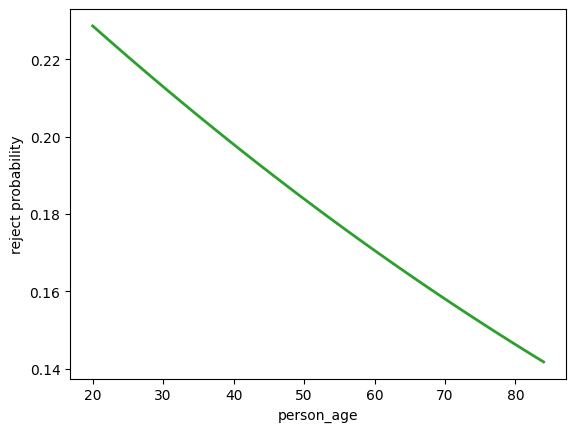

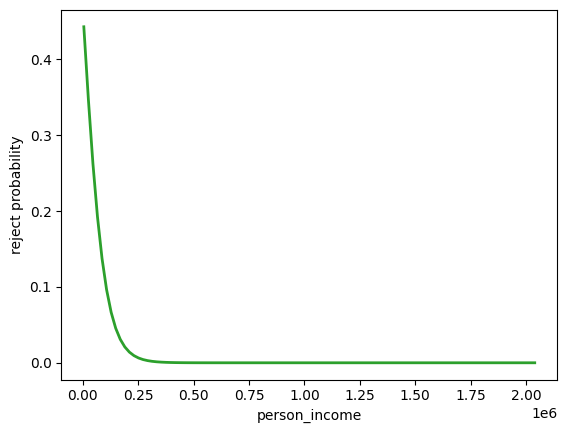

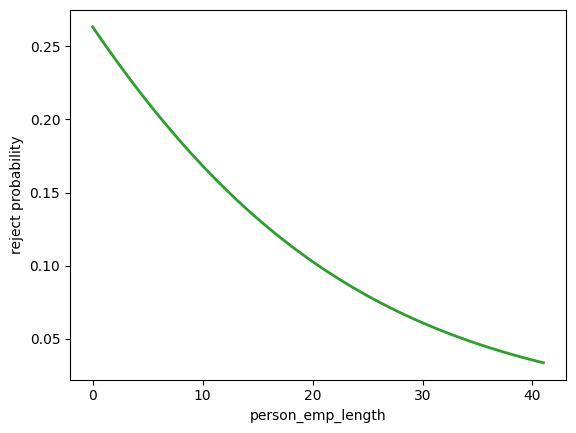

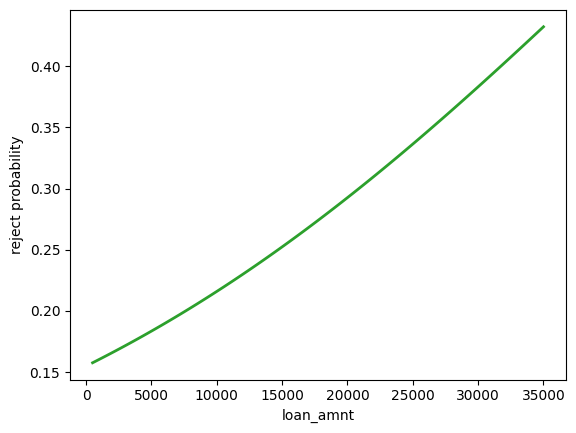

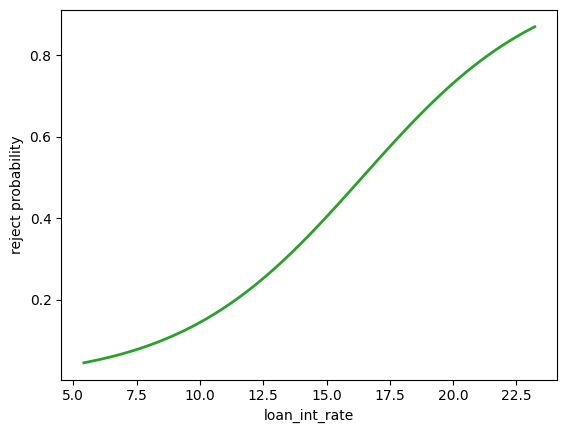

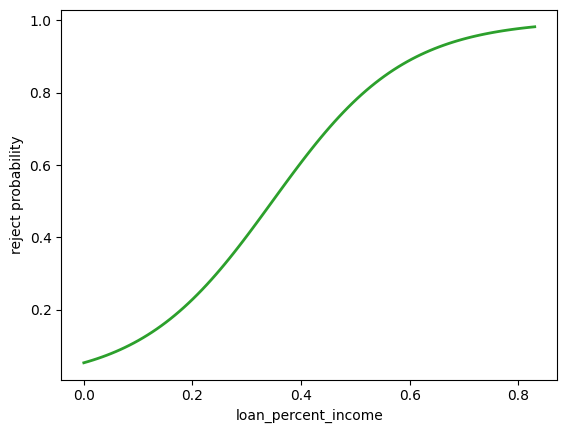

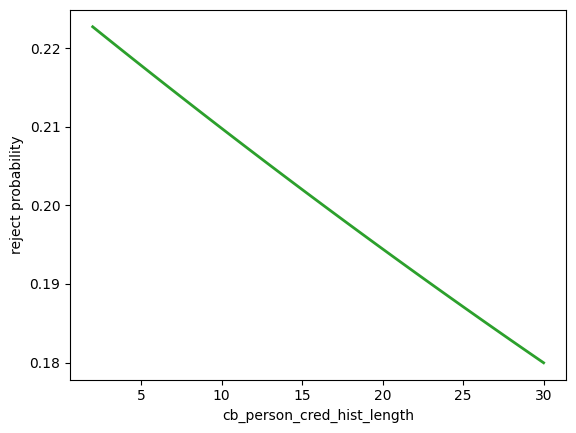

In [86]:
columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
]

x_dict = {}
y_dict = {}
clf_dict = {}

for column in columns:
    print(f'column: {column}')
    x_dict[column] = data[column].to_numpy().reshape(-1, 1)
    y_dict[column] = data['loan_status'].to_numpy()

    model = sklearn.linear_model.LogisticRegression()
    clf_dict[column] = model.fit(x_dict[column], y_dict[column])

    print(f'clf score - base_accuracy: {clf_dict[column].score(x_dict[column], y_dict[column]) - base_accuracy}')

    x_min = x_dict[column].min()
    x_max = x_dict[column].max()
    print(f'x range: {x_min}, {x_max}')
    xx = numpy.linspace(x_min, x_max, 100)
    #xx = numpy.linspace(-500, 500, 100)

    plt.figure()
    plt.plot(
        xx,
        clf_dict[column].predict_proba(xx.reshape(-1, 1))[:, 1],
        color='tab:green',
        linewidth=2,
    )
    plt.xlabel(column)
    plt.ylabel('reject probability')

None

## Run analysis

In [30]:
# Collect input data arrays
x_person_age = data['person_age'].to_numpy().reshape(-1, 1)
x_person_income = data['person_income'].to_numpy().reshape(-1, 1)
x_person_emp_length = data['person_emp_length'].to_numpy().reshape(-1, 1)
x_loan_amnt = data['loan_amnt'].to_numpy().reshape(-1, 1)
x_loan_int_rate = data['loan_int_rate'].to_numpy().reshape(-1, 1)
x_loan_percent_income = data['loan_percent_income'].to_numpy().reshape(-1, 1)
x_cb_person_cred_hist_length = data['cb_person_cred_hist_length'].to_numpy().reshape(-1, 1)

# Remove NaN values by replacing with mean value
x_loan_int_rate_no_nan = x_loan_int_rate[numpy.isfinite(x_loan_int_rate)]
#print(f'l: {len(x_loan_int_rate_no_nan)}, {len(x_loan_int_rate)}')
x_loan_int_rate_mean = x_loan_int_rate_no_nan.mean()
#print(f'mean: {x_loan_int_rate_mean}')
x_loan_int_rate[numpy.isnan(x_loan_int_rate)] = x_loan_int_rate_mean
#print(x_loan_int_rate)

x = numpy.concatenate([x_loan_int_rate, x_loan_percent_income], axis=1)
#print(x.shape)

scaler = preprocessing.StandardScaler().fit(x)

#print(scaler.mean_)
#print(scaler.scale_)

x_scaled = scaler.transform(x)

y = data['loan_status'].to_numpy()
#print(y.shape)

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x_scaled, y)

print(f'clf score: {clf.score(x_scaled, y)}')

clf score: 0.8233445096395641


x range: 4.0, 25.0
y range: 0.0, 1.0


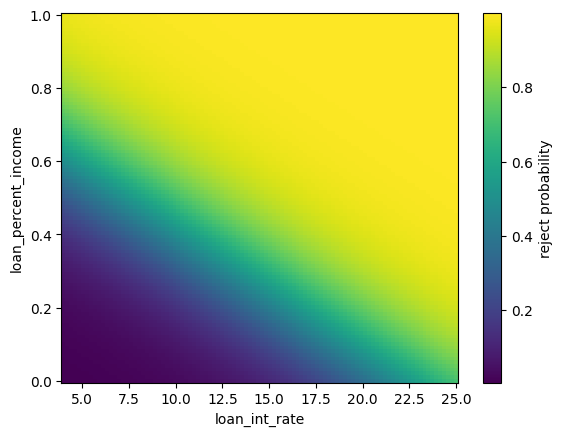

In [31]:
x_min = 4.0 #x_loan_int_rate.min()
x_max = 25.0 #x_loan_int_rate.max()

y_min = 0.0 #x_loan_percent_income.min()
y_max = 1.0 #x_loan_percent_income.max()

print(f'x range: {x_min}, {x_max}')
print(f'y range: {y_min}, {y_max}')
xx = numpy.linspace(x_min, x_max, 100)
yy = numpy.linspace(y_min, y_max, 100)

meshgrid_x, meshgrid_y = numpy.meshgrid(xx, yy)
xxyy = numpy.column_stack((meshgrid_x.flatten(), meshgrid_y.flatten()))
xxyy_scaled = scaler.transform(xxyy)
zz = clf.predict_proba(xxyy_scaled)[:, 1]
zz = zz.reshape(meshgrid_x.shape)

plt.pcolormesh(meshgrid_x, meshgrid_y, zz)
plt.colorbar(label='reject probability')
plt.xlabel('loan_int_rate')
plt.ylabel('loan_percent_income')
None

In [32]:
x1 = numpy.concat(
    [
        data_test['loan_int_rate'].to_numpy().reshape(-1, 1),
        data_test['loan_percent_income'].to_numpy().reshape(-1, 1),
    ],
    axis=1,
)
x1_scaled = scaler.transform(x1)
y1 = clf.predict_proba(x1_scaled)

data_predict = pandas.DataFrame(
    {
        'id': data_test['id'],
        'loan_status': y1[:, 1],
    }
)

In [116]:
data_predict.to_csv('data_test_predict_original_2-logistic_loan_int_rate_loan_percent_income.csv', index=False)

# Calculate Log Likelihood

In [34]:
y_predict_proba = clf.predict_proba(x_scaled)
log_loss_value_model_2 = log_loss(y, y_predict_proba)
log_loss_value_model_2

0.40104117523060107

In [35]:
AIC_model_1 = 2 * 1 - 2 * log_loss_value_model_1
AIC_model_1

1.0904550861016347

In [36]:
AIC_model_2 = 2 * 2 - 2 * log_loss_value_model_2
AIC_model_2

3.1979176495387978

# Compare the above LL value with the value from the model with 1 less parameter

- Since model 1, the 1 parameter model, has a smaller AIC value, this is the preferred model
- The Log-Likelihood values of both models are approximatly equal
- Adding an additional parameter adds an additional penalty term of 3
- Since the Log-Likelihood values are smaller than 1, the penalty term dominates
- From this, the conclusion is that a single parameter model is preferred